In [264]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [265]:
import pandas as pd
import numpy as np

df= pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv")
print(df.dtypes)

RecordID        int64
X             float64
Y             float64
FID             int64
BusinessID      int64
Name           object
Address        object
StreetNo        int64
StreetName     object
BldgNo         object
UnitNo         object
PostalCode     object
Location       object
Ward            int64
NAICSCode       int64
NAICSCat       object
NAICSDescr     object
Phone          object
Fax            object
TollFree       object
EMail          object
WebAddress     object
EmplRange       int64
CENT_X        float64
CENT_Y        float64
Year            int64
isnew          object
Closed         object
dtype: object


In [266]:
df = df[df['Year'] == 2019] #if we just look at closed from 2019

In [267]:
df.drop(['Year'], axis=1, inplace=True) #if we just look at closed from 2019

In [268]:
#NAICSCode back to object as it is nominal not ordinal
df['NAICSCode'] = df['NAICSCode'].astype(str)

In [269]:
# Let's display first 10 records 
df.head(10)

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,...,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,isnew,Closed
46689,46690,-79.665386,43.684736,1,7,Peel Car & Truck Rentals,7050 Bramalea Rd,7050,Bramalea Rd,Yes,...,905-670-2442,905-670-6458,Yes,Yes,Yes,1,607567.2334,4.837723e+06,No,No
46690,46691,-79.642760,43.593515,2,4246,Real Fruit Bubble Tea,100 City Centre Dr,100,City Centre Dr,No,...,,,No,No,Yes,2,609556.5032,4.827621e+06,Yes,No
46691,46692,-79.667311,43.682752,3,10,Unifor 2002,7015 Tranmere Dr,7015,Tranmere Dr,No,...,905-678-1551,905-678-0100,Yes,Yes,Yes,3,607415.6044,4.837500e+06,No,No
46692,46693,-79.629235,43.698932,4,4247,Laura with Plus and Petites,100 City Centre Dr,100,City Centre Dr,No,...,905-277-8247,,No,No,Yes,2,610454.8654,4.839347e+06,Yes,No
46693,46694,-79.629235,43.698932,5,4250,Footlocker,100 City Centre Dr,100,City Centre Dr,No,...,905-276-7172,,No,No,No,4,610454.8654,4.839347e+06,Yes,No
46694,46695,-79.629235,43.698932,6,16,Nuance Group,3130 Caravelle Dr,3130,Caravelle Dr,No,...,905-676-2857,905-676-4895,No,Yes,No,7,610454.8654,4.839347e+06,No,No
46695,46696,-79.642760,43.593515,7,4251,Classic Fit Dry Clean & Alterations,100 City Centre Dr,100,City Centre Dr,No,...,905-276-1507,,No,No,No,2,609556.5032,4.827621e+06,No,No
46696,46697,-79.609921,43.691037,8,18,Fire Station 119,3201 Elmbank Rd,3201,Elmbank Rd,No,...,905-615-3777,,No,No,Yes,4,612025.8862,4.838496e+06,No,No
46697,46698,-79.642760,43.593515,9,4257,L'Occitane En Provence,100 City Centre Dr,100,City Centre Dr,No,...,905-848-2442,,No,No,Yes,1,609556.5032,4.827621e+06,No,No
46698,46699,-79.642760,43.593515,10,4259,Peoples Jewellers,100 City Centre Dr,100,City Centre Dr,No,...,905-277-9507,905-277-3018,No,No,Yes,3,609556.5032,4.827621e+06,No,No


In [270]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16518 entries, 46689 to 63206
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    16518 non-null  int64  
 1   X           16518 non-null  float64
 2   Y           16518 non-null  float64
 3   FID         16518 non-null  int64  
 4   BusinessID  16518 non-null  int64  
 5   Name        16518 non-null  object 
 6   Address     16518 non-null  object 
 7   StreetNo    16518 non-null  int64  
 8   StreetName  16518 non-null  object 
 9   BldgNo      16518 non-null  object 
 10  UnitNo      16518 non-null  object 
 11  PostalCode  16518 non-null  object 
 12  Location    16518 non-null  object 
 13  Ward        16518 non-null  int64  
 14  NAICSCode   16518 non-null  object 
 15  NAICSCat    16518 non-null  object 
 16  NAICSDescr  16518 non-null  object 
 17  Phone       16518 non-null  object 
 18  Fax         16518 non-null  object 
 19  TollFree    16518 non

In [271]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,RecordID,X,Y,FID,BusinessID,StreetNo,Ward,EmplRange,CENT_X,CENT_Y
count,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,1.651800e+04
mean,54948.500000,-79.657689,43.601356,8259.500000,38317.374803,2949.933285,5.372927,2.183981,608803.895873,4.828662e+06
std,4768.480209,0.046612,0.056180,4768.480209,32183.768108,2364.551005,2.452044,1.450311,3622.954311,6.225972e+03
min,46690.000000,-79.802980,43.485170,1.000000,7.000000,1.000000,1.000000,1.000000,596627.934200,4.815547e+06
25%,50819.250000,-79.697599,43.560065,4130.250000,10300.250000,1050.250000,5.000000,1.000000,606962.728400,4.824380e+06
50%,54948.500000,-79.655443,43.600388,8259.500000,20467.000000,2380.000000,5.000000,2.000000,609549.255500,4.828519e+06
75%,59077.750000,-79.622510,43.643674,12388.750000,57398.250000,5144.500000,7.000000,3.000000,611124.363600,4.833333e+06
max,63207.000000,-79.550935,43.732864,16518.000000,93823.000000,7895.000000,11.000000,9.000000,616985.055200,4.843108e+06


In [272]:
df.drop(['RecordID','FID','BusinessID','StreetNo','Ward','CENT_X','CENT_Y','EmplRange'], axis=1, inplace=True)


In [273]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Closed and everything else will be used as features 
class_col_name='Closed' 

feature_names=df.columns[df.columns != class_col_name ]
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.2,random_state=1) 

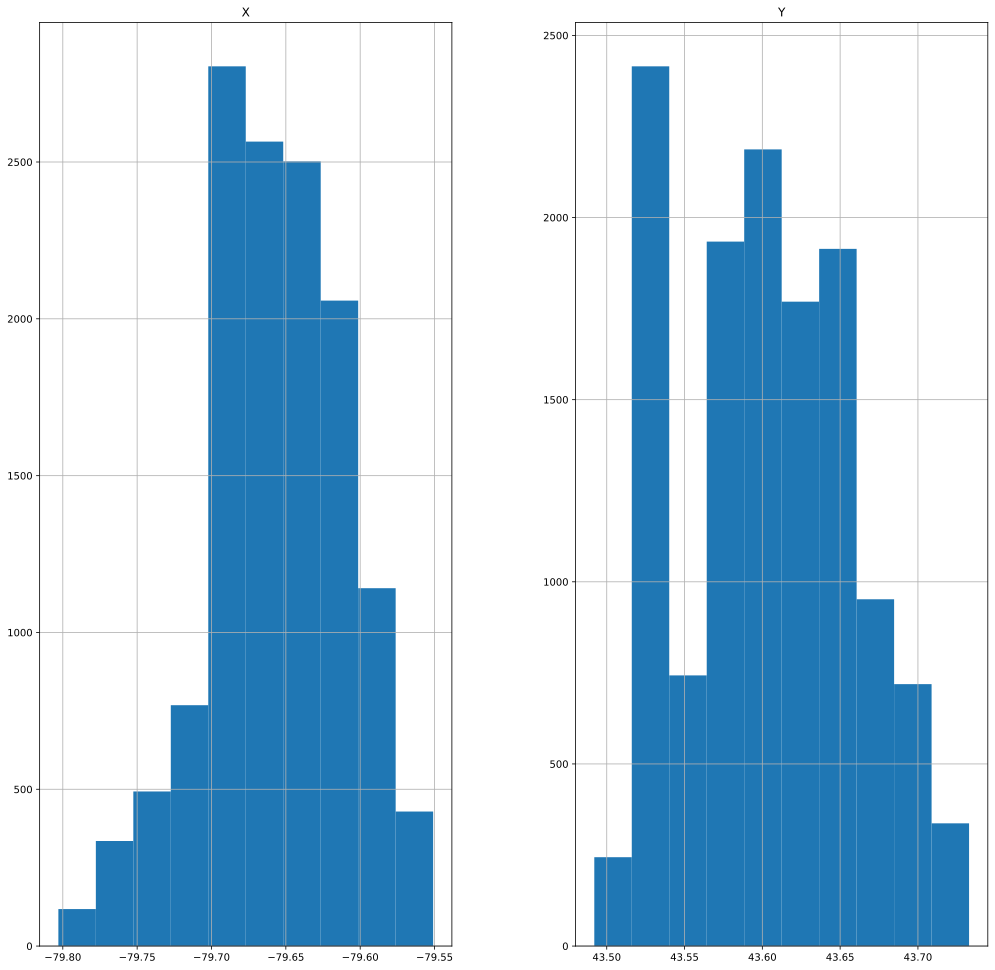

In [274]:
#plot the distribution of continuous variables

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[17,17])
from IPython.display import set_matplotlib_formats # for better resolution in pdf export
set_matplotlib_formats('pdf', 'svg')

In [275]:
#change categorical values to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
    # Using whole data to form an exhaustive list of levels
      data=X_train[col].append(X_test[col])
      le.fit(data.values)
      X_train[col]=le.transform(X_train[col])
      X_test[col]=le.transform(X_test[col])

#4 minutes 24 seconds to run this 

<ipython-input-275-9b0bb92014d6>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=X_train[col].append(X_test[col])
<ipython-input-275-9b0bb92014d6>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=X_train[col].append(X_test[col])
<ipython-input-275-9b0bb92014d6>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=X_train[col].append(X_test[col])
<ipython-input-275-9b0bb92014d6>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=X_train[col].append(X_test[col])
<ipython-input-275-9b0bb92014d6>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [ ]:
#help(tree.DecisionTreeClassifier)

In [276]:
#Decision tree 5 levels deep
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")


Successfuly trained the decision tree...


Class Names ['No' 'Yes']


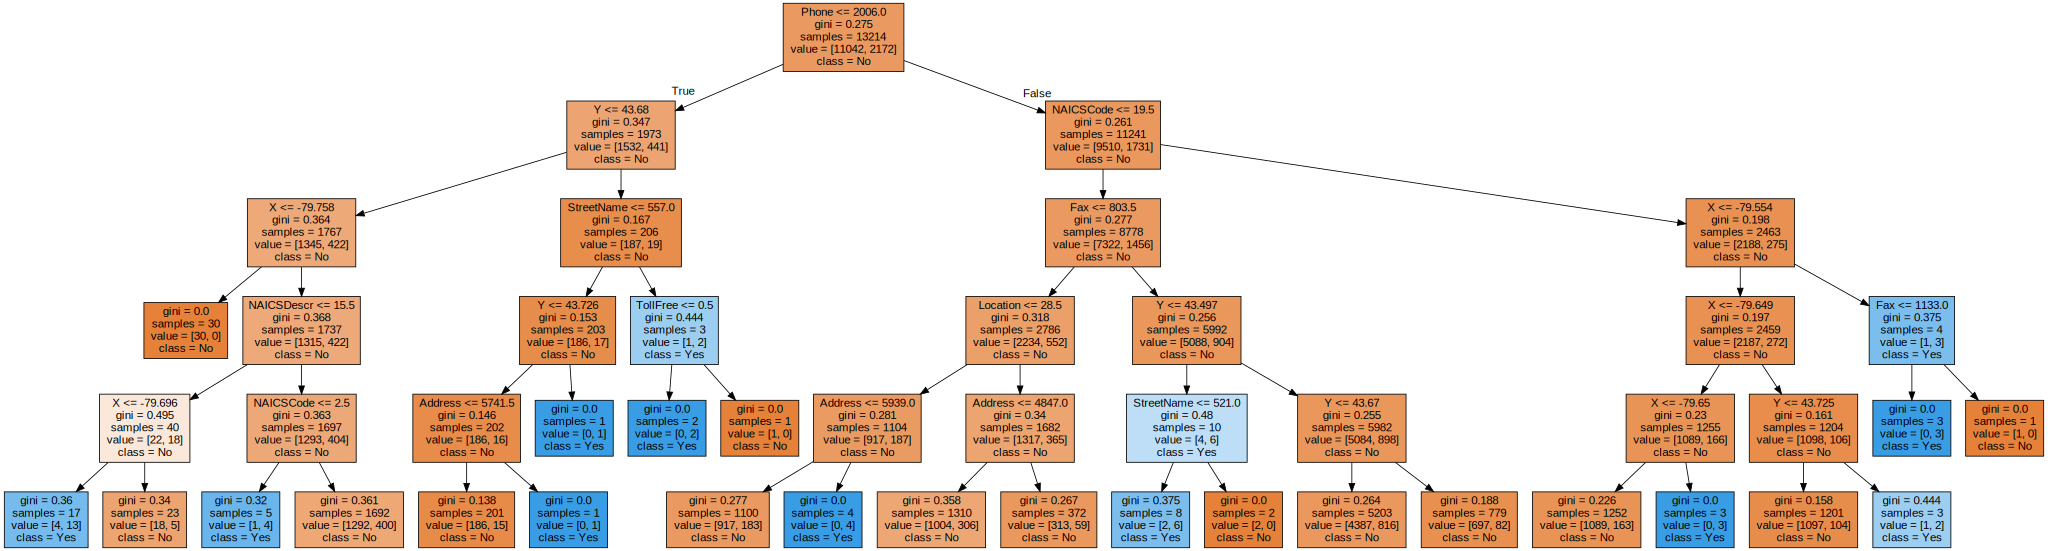

In [277]:
#plot the decision tree
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("Class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [278]:
# Let's make the prdictions on the test set that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[2752   10]
 [ 538    4]]
TP:  4 , FP:  10 , TN:  2752 , FN: 538


In [280]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for the dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      2762
         Yes       0.29      0.01      0.01       542

    accuracy                           0.83      3304
   macro avg       0.56      0.50      0.46      3304
weighted avg       0.75      0.83      0.76      3304



In [281]:
#Similarly we can Train and Test in Bayes
#from sklearn.naive_bayes import MultinomialNB
#Since we have negative values in the X column use GaussianNB instead of MultinomialNB
from sklearn.naive_bayes import GaussianNB
######from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
#####nb = MultinomialNB()
nb = GaussianNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [282]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 19


In [283]:
#print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
#print("Log prior probability for classes ", nb.class_log_prior_)
print("Probability of each class", nb.class_prior_) 
#print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)
print("float absolutive additive value to variances", nb.epsilon_) 
#print("array,shape variance of each feature per class",nb.sigma_) 
print("array,shape mean of each feature per class",nb.theta_) 

Classes  ['No' 'Yes']
Number of records for classes  [11042.  2172.]
Probability of each class [0.83562888 0.16437112]
float absolutive additive value to variances 0.021032330650500256
array,shape mean of each feature per class [[-7.96575960e+01  4.36025371e+01  7.72517171e+03  2.89902373e+03
   2.74015577e+02  5.11682666e-02  6.55859446e-01  1.32051259e+01
   3.16664554e+01  1.31677232e+01  9.71418221e+00  3.22962145e+02
   7.66111212e+03  2.82494584e+03  1.49972831e-01  6.10215541e-01
   7.42800217e-01  1.00978084e-01]
 [-7.96598839e+01  4.35966464e+01  7.57958057e+03  2.84230617e+03
   2.75028085e+02  4.41988950e-02  7.05340700e-01  1.33462247e+01
   3.40626151e+01  1.23678637e+01  1.02808471e+01  3.22968232e+02
   7.21436326e+03  2.51757689e+03  1.66666667e-01  5.92081031e-01
   7.23296501e-01  1.36740331e-01]]


In [284]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      2762
         Yes       0.19      0.01      0.01       542

    accuracy                           0.83      3304
   macro avg       0.51      0.50      0.46      3304
weighted avg       0.73      0.83      0.76      3304



In [285]:
#decribe categorical data
df.describe(include='O')

,Name,Address,StreetName,BldgNo,UnitNo,PostalCode,Location,NAICSCode,NAICSCat,NAICSDescr,Phone,Fax,TollFree,EMail,WebAddress,isnew,Closed
count,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518,16518
unique,15233,5959,598,2,2,34,56,24,19,687,15531,9431,2,2,2,2,2
top,Subway,100 City Centre Dr,Dundas St E,No,Yes,L4W,Northeast EA (West),81,Retail Trade,Limited-service eating places,,,No,Yes,Yes,No,No
freq,43,222,667,15689,10986,2714,4131,1873,2303,808,403,6777,14030,10058,12202,14772,13804


In [286]:
#drop columns that have unique values
#df.drop(['Name','Address','StreetName','NAICSDescr'], axis=1, inplace=True)
df.drop(['Name','Address','StreetName','NAICSDescr',"PostalCode", "BldgNo", "NAICSCat","NAICSCode", "Phone", "Fax","TollFree"], axis=1, inplace=True)

In [287]:
#Let's create a list for our categorical columns for the dataset, we need this later
#cat_cols=["PostalCode", "BldgNo", "UnitNo","NAICSCat","NAICSCode", "Phone", "Fax","TollFree","WebAddress","isnew","EMail","Location"]
cat_cols=["UnitNo","WebAddress","isnew","EMail","Location"]

In [288]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

,X,Y,Closed,UnitNo_No,UnitNo_Yes,WebAddress_No,WebAddress_Yes,isnew_No,isnew_Yes,EMail_No,...,Location_Sheridan NHD,Location_Sheridan Park CC,Location_South Common CN,Location_Southdown EA,Location_Special Study Area,Location_Streetsville CN,Location_Streetsville NHD,Location_UTM SPA,Location_Uptown MN,Location_Western Business Park EA
46689,-79.665386,43.684736,No,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46690,-79.642760,43.593515,No,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46691,-79.667311,43.682752,No,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46692,-79.629235,43.698932,No,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46693,-79.629235,43.698932,No,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63202,-79.697599,43.517559,Yes,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
63203,-79.697599,43.517559,No,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
63204,-79.697599,43.517559,Yes,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
63205,-79.697599,43.517559,No,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [289]:
#X column has negative values. Those column values won't work with Naive Bayes. So run the following
# line of code for the data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
df_onehot["X"]=df_onehot["X"].apply(lambda x: 0 if x<0 else x)


In [290]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split

# Uncomment following line for class name for the dataset
class_col_name="Closed"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.2,random_state=109) # 80% training and 20% test

In [291]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()
print ("Succesfully NB done..")
#Train the model using the training sets
nb.fit(X_train, y_train)
print ("Succesfully fit done..")
#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully NB done..
Succesfully fit done..
Succesfully done..


In [292]:
#print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Classes  ['No' 'Yes']
Number of records for classes  [11036.  2178.]
Log prior probability for classes  [-0.18011422 -1.80286985]
Log conditional probability for each feature given a class
 [[-13.19270961  -0.10868217  -4.95232449  -4.30436674  -5.22959755
   -4.1850976   -3.99282369  -6.15217322  -4.833809    -4.37245324
   -7.63202798  -8.51988077  -8.01092606  -8.29486981  -8.94421437
  -13.19270961  -9.00305487  -8.48317941  -9.93461307  -9.03382652
   -8.94421437  -7.79908206  -9.55512345  -7.65537534  -7.14062044
  -10.05721539  -8.71537279  -6.70960226  -7.90950588  -9.03382652
   -9.01832234  -8.9732019   -8.23688255  -6.77761265  -8.34852252
   -8.6818501  -10.19697733  -8.02222561  -9.20372556  -9.06557522
   -8.64941483  -7.7288778   -6.89376036  -9.3215086   -9.14965834
   -9.38604712  -9.55512345  -9.97383378  -7.6281892   -5.26466401
   -8.24394972  -9.16735792  -9.7269737   -9.14965834  -8.82326176
   -9.18537642  -9.30088931  -9.97383378  -9.50383015  -8.34067934
  -11.

In [293]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[2768    0]
 [ 536    0]]
TP:  0 , FP:  0 , TN:  2768 , FN: 536


In [294]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      2768
         Yes       0.00      0.00      0.00       536

    accuracy                           0.84      3304
   macro avg       0.42      0.50      0.46      3304
weighted avg       0.70      0.84      0.76      3304



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


class Names ['No' 'Yes']


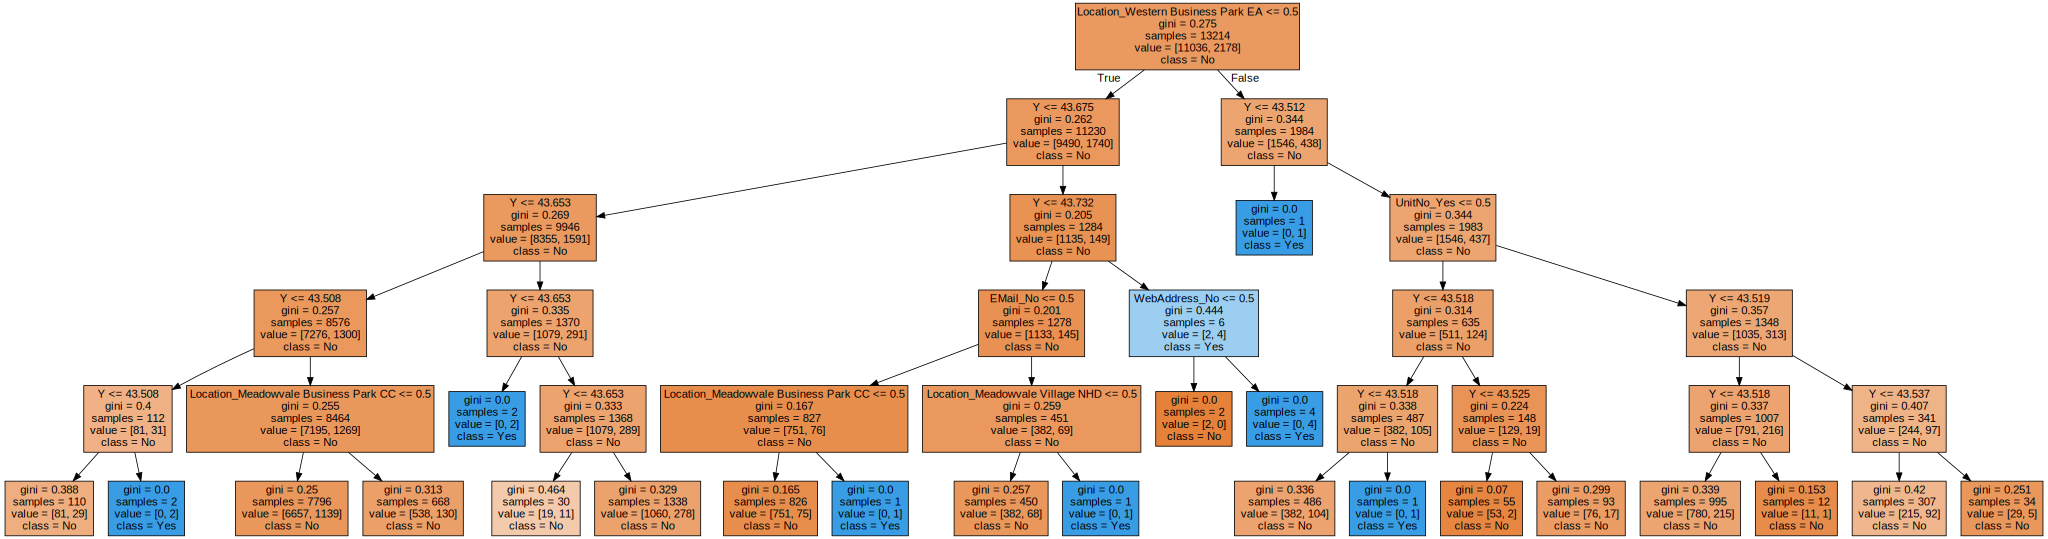

In [295]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [296]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [297]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91      2768
         Yes       0.29      0.00      0.01       536

    accuracy                           0.84      3304
   macro avg       0.56      0.50      0.46      3304
weighted avg       0.75      0.84      0.76      3304



In [298]:
#from pandas_profiling import ProfileReport
@from ydata_profiling import ProfileReport

@profile = ProfileReport(df)

In [ ]:
# Produce the data profiling report

#profile.to_file("/content/drive/MyDrive/CIND 820 Capstone Project/sklearndtbayes.html")